epoch: 1, loss: 5734.2012
epoch: 101, loss: 556.8454
epoch: 201, loss: 342.3051
epoch: 301, loss: 332.9979
epoch: 401, loss: 332.5867
epoch: 501, loss: 332.5684
epoch: 601, loss: 332.5676
epoch: 701, loss: 332.5675
epoch: 801, loss: 332.5676
epoch: 901, loss: 332.5676


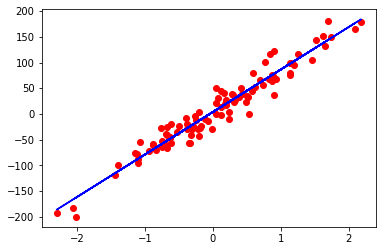

In [4]:
### Linear regression model
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as ply

#----------------------
# 0. prepare data
#----------------------
X_numpy, Y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
# convert from numpy to tensor
X = torch.from_numpy(X_numpy.astype(np.float32)) 
Y = torch.from_numpy(Y_numpy.astype(np.float32))
#reshape the tensor 
Y = Y.view(Y.shape[0], 1) 
n_samples, n_features = X.shape

#----------------------
# 1. build model
#----------------------
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

#----------------------
# 2. loss and optimizer
#----------------------
learning_rate = 0.01
# Loss = Mean squared error
criterion = nn.MSELoss()
# gradient = SGD(Sarcastic gradient decent)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#----------------------
# 3. training loop
#----------------------
num_epoch = 1000
for epoch in range(num_epoch):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)
    
    # backward pass
    loss.backward()
    
    # weight updates
    optimizer.step()
    
    # empty the gradiant for next iteration
    optimizer.zero_grad()
    
    if epoch%100 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')
        

#Plot 
predicted = model(X).detach().numpy() # detach to detach the gradiant attribute from the tensor
ply.plot(X_numpy, Y_numpy, 'ro')
ply.plot(X_numpy, predicted, 'b')

    

